In [ ]:
!pip install -i https://test.pypi.org/simple/ all-in-one-ml==0.0.3

Looking in indexes: https://test.pypi.org/simple/


In [ ]:
from all_in_one_ml import beginner
from sklearn import datasets
import pandas as pd

In [ ]:
data = datasets.fetch_openml('blood-transfusion-service-center')

In [ ]:
df = pd.DataFrame(data.data,columns = data.feature_names)
df['class'] = data.target

In [ ]:
df.head()

,V1,V2,V3,V4,class
0,2.0,50.0,12500.0,98.0,2
1,0.0,13.0,3250.0,28.0,2
2,1.0,16.0,4000.0,35.0,2
3,2.0,20.0,5000.0,45.0,2
4,1.0,24.0,6000.0,77.0,1


In [ ]:
x = df.drop(columns=['class'])
y = df['class']

In [ ]:
y_hot = beginner.one_hot(x,y,onlyoutcome=True)
print(x,y_hot)

       V1    V2       V3    V4
0     2.0  50.0  12500.0  98.0
1     0.0  13.0   3250.0  28.0
2     1.0  16.0   4000.0  35.0
3     2.0  20.0   5000.0  45.0
4     1.0  24.0   6000.0  77.0
..    ...   ...      ...   ...
743  23.0   2.0    500.0  38.0
744  21.0   2.0    500.0  52.0
745  23.0   3.0    750.0  62.0
746  39.0   1.0    250.0  39.0
747  72.0   1.0    250.0  72.0

[748 rows x 4 columns]      1  2
0    0  1
1    0  1
2    0  1
3    0  1
4    1  0
..  .. ..
743  1  0
744  1  0
745  1  0
746  1  0
747  1  0

[748 rows x 2 columns]


In [ ]:
x_train,x_test,y_train,y_test = beginner.split_dataset(x,y_hot,0.2,8)

(598, 4) (598, 2) (150, 4) (150, 2)


In [ ]:
x_train.head()

,V1,V2,V3,V4
274,4.0,5.0,1250.0,58.0
547,2.0,3.0,750.0,11.0
475,26.0,5.0,1250.0,49.0
370,4.0,2.0,500.0,51.0
286,4.0,2.0,500.0,23.0


In [ ]:
y_train.head()

,1,2
274,1,0
547,1,0
475,0,1
370,0,1
286,1,0


In [ ]:
model,history = beginner.build_compile_fit_model(x_train,y_train,'classification',30,3,[100,100,100],['relu','relu','relu'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 202       
Total params: 20,902
Trainable params: 20,902
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
15/15 [==============================] - 0s 11ms/step - loss: 25.0907 - accuracy: 0.6381 - val_loss: 22.1344 - val_accuracy: 0.2917
Epoch 2/30
15/15 [==============================] - 0s 3ms/step - loss: 10.1853 - accuracy: 0.6381 - val_

In [ ]:
beginner.get_accuracy(x_test,y_test,model)

5/5 [==============================] - 0s 2ms/step - loss: 1.4153 - accuracy: 0.6133


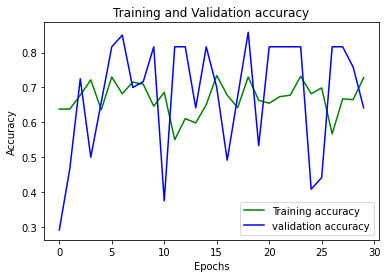

In [ ]:
beginner.accuracy_vs_valaccuracy(model,history,30)

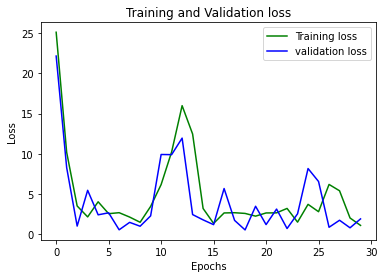

In [ ]:
beginner.loss_vs_valloss(model,history,30)